In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<h1>Perceptron: AND gate Example</h1>

In [2]:
import tensorflow as tf
import numpy as np

<h2>Set up hyperparameters:</h2>

In [3]:
#define number of training iterations
NUM_ITER = 100
#define learning rate
lr = 0.1

<h2>Set up training data:</h2>

In [4]:
#define the training input data
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
#define the target outputs/labels for AND gate
y = np.array([0,0,1,0],np.float32)
#y = np.array([0,1,1,1],np.float32)       (uncomment this line if you are doing OR gate)
y = np.reshape(y,[4,1])

<h2>Reset the graph before you re-train your neural net:</h2>

In [18]:
#remember to reset the graph
tf.reset_default_graph()

<h2>Define Placeholder nodes:</h2>

In [20]:
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

<h2>Define training variables:</h2>

In [21]:
#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define cost function and update rules:</h2>

In [22]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training:</h2>

In [23]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x,Y:y})
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(b))
    

In [24]:
#check the values of weight
print(W)

[0.22194901 0.10206663]


In [25]:
#check the value of bias
print(b)

-0.3


<h2>We can plot out the learned decision boundary using matplotlib</h2>

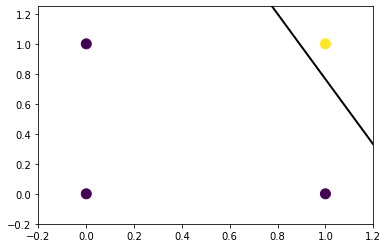

In [26]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()